In [1]:
using PyPlot
using OptimTools

# Solving Laplace Equation with Steepest Descent

Prepared by [Lars Ruthotto](http://www.mathcs.emory.edu/~lruthot/), 2016.

## Outline

In this notebook, we use the steepest descent method (code `sd` from [`OptimTools.jl`](https://github.com/lruthotto/OptimTools.jl) with exact line search for solving the Laplace equation, that is,

$$
    - \Delta u = b \quad \text{ with } \quad u(0,x_2)=u(1,x_2)=u(x_1,0)=u(x_1,1)=0.
$$

Let $Q_h$ be a discretization of the Laplace operator on some grid, where the parameter $h>0$ corresponds to the mesh size. We can phrase this problem as an optimization problem

$$
 min_{u} \frac{1}{2} u^\top Q_h u - u^\top b.
$$ 

We have seen that convergence of the steepest descent method depends on the condtion number of the Hessian of the objective function, which is in our case $Q_h$. Thus, we expect slower convergence on grids with finer resolution (refer to your favorite text on numerical analysis for details).

## Discretization

We first discretize the Laplacian and some test image (replace it with a more interesting one if you like).

In [6]:
function getLaplacian(n)
#      dx = spdiagm((-ones(n-1),ones(n-1)),0:1,n-1,n)
     dx = spdiagm((-ones(n),ones(n)),-1:0,n+1,n)
     dx[1,1] = 2
     dx[end,end] = -2
     dx ./= n
    
    GRAD = [kron(speye(n),dx); kron(dx,speye(n))]
       
    return GRAD'*GRAD
end

function getRHS(n)
    x1 = linspace(0,1,n)
    x2 = linspace(0,1,n)
    rhs  = float([(.2*(x-0.5)^2 + (y-0.5)^2<0.04)*1.0 +  (.2*(x-0.5)^2 + (y-0.5)^2<0.01)*10.0 for x=x1,y=x2])
    return rhs
end

getRHS (generic function with 1 method)

# Solve using SD for different grid sizes

Lets now use steepest descent on a coarse and a fine mesh. Note that we overload the standard line search in `sd` by an exact line search (see slides for derivation). To make the example a little bit more interesting, we also add some noise to the right hand side.

In [3]:
n1 = 32;
Q = getLaplacian(n1)
b = vec(getRHS(n1)+randn(n1,n1))
f(x)  = 0.5*dot(x,Q*x) - dot(b,x)
df(x) = Q*x - b
x0 = zeros(n1^2)
lineSearch(f,J,fk,dfk,xk,pk) = (-dot(pk,dfk)/dot(pk,Q*pk),1)
x1,flag1,his1 = sd(f,df,x0,maxIter=1000,atol=1e-4,lineSearch=lineSearch);

n2 = 64;
Q = getLaplacian(n2)
b = vec(getRHS(n2)+randn(n2,n2))
f(x)  = 0.5*dot(x,Q*x) - dot(b,x)
df(x) = Q*x - b
x0 = zeros(n2^2)

lineSearch(f,J,fk,dfk,xk,pk) = (-dot(pk,dfk)/dot(pk,Q*pk),1)
x2,flag2,his2 = sd(f,df,x0,maxIter=1000,atol=1e-4,lineSearch=lineSearch);


sd iterated maxIter (=1000) times but reached only atol of 1.78e+00 instead of tol=1.00e-04
sd iterated maxIter (=1000) times but reached only atol of 6.20e+01 instead of tol=1.00e-04


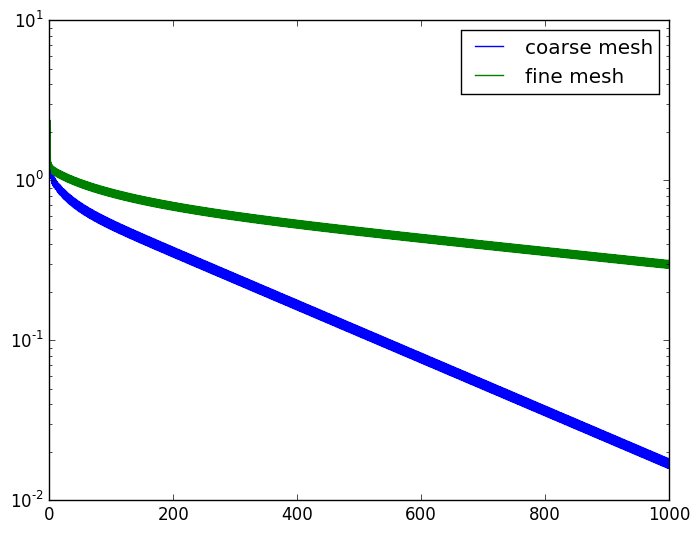

PyObject <matplotlib.legend.Legend object at 0x320f066d0>

In [4]:
semilogy(his1[:,2]/his1[1,2],hold=true)
semilogy(his2[:,2]/his2[1,2])
legend(("coarse mesh","fine mesh"))

### Conclusion
Convergence of steepest descent depends on mesh size. This is to be expected from the fact that the condition number of $Q_h$ grows as $h\to 0$. Since the number of iterations needed to obtain a certain accuracy increases as $h\to0$ we conclude that SD shows *mesh dependent convergence* for this problem.

## View results

Display right hand side and results from both meshes.

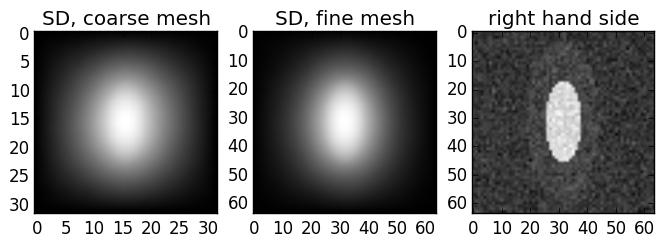

PyObject <matplotlib.text.Text object at 0x321621a10>

In [5]:
subplot(1,3,1)
imshow(reshape(x1,n1,n1),cmap="gray")
title("SD, coarse mesh")
subplot(1,3,2)
imshow(reshape(x2,n2,n2),cmap="gray")
title("SD, fine mesh")

subplot(1,3,3)
imshow(reshape(b,n2,n2),cmap="gray")
title("right hand side")
